In [24]:
import pandas as pd
import numpy as np
pd.set_option("max_columns", 500)

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
lbc = load_breast_cancer()

In [14]:
#lbc

In [13]:
dfX = pd.DataFrame(lbc.data, columns=lbc.feature_names)
dfY = pd.DataFrame(lbc.target, columns=["y"])

In [15]:
dfX.shape, dfY.shape

((569, 30), (569, 1))

In [25]:
dfX

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
dfY

,y
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


-----

In [18]:
from sklearn.model_selection import train_test_split
trainX, validnX, trainY, validnY = train_test_split(dfX, dfY, test_size=0.2)

In [19]:
trainX.shape, trainY.shape, validnX.shape, validnY.shape

((455, 30), (455, 1), (114, 30), (114, 1))

-----

In [20]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [21]:
xgb.fit(trainX, trainY)

C:\MyProgram\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\MyProgram\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [28]:
predY = xgb.predict(validnX)

-----

### 混同行列

In [35]:
# 混同行列を書く
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validnY, predY)
print(cm)

[[51  0]
 [ 1 62]]


In [33]:
# 並び順はこう

# 　　　　予想０,1
# 実際０　[[51  0]
# 実際１ [ 1 62]]

# TN  FP
# FN  TP

In [36]:
# 取り出す場合、flattenを使うと便利
cm.flatten()

array([51,  0,  1, 62], dtype=int64)

In [40]:
tn,fp,fn,tp = cm.flatten()
print("TN:",tn)
print("FP:",fp)
print("FN:",fn)
print("TP:",tp)

TN: 51
FP: 0
FN: 1
TP: 62


-------

In [51]:
validnY

,y
7,0
398,1
126,0
479,0
298,1
...,...
524,1
74,1
177,0
434,1


In [ ]:
# predYは0,1じゃなくてナマの値0.1とか0.9とか出さないとだめか
#

### ROC

In [45]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
roc_curve(validnY, predY)

(array([0., 0., 1.]),
 array([0.        , 0.98412698, 1.        ]),
 array([2, 1, 0]))

In [46]:
# FPR 偽陽性
#(array([0., 0., 1.]),

# TPR 真陽性
# array([0.        , 0.98412698, 1.        ]),

# 閾値
# array([2, 1, 0]))

In [47]:
fpr,tpr, thresholds = roc_curve(validnY, predY)

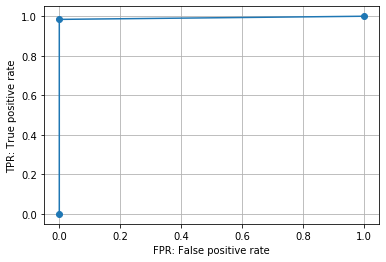

In [48]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

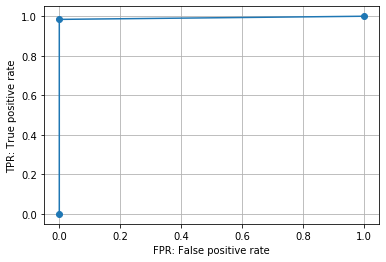

In [50]:
fpr_all, tpr_all, thresholds_all = roc_curve(validnY, predY,
                                             drop_intermediate=False)
plt.plot(fpr_all, tpr_all, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()